In [1]:
import pandas as pd
import numpy as np

### TODO:
1. Load data using Pandas read_csv function
2. Split data into x(independent) and y(dependent) variables
3. Since we have only 1 feature(x),reshape them so that we could feed them into our linear regression model. 
4. Use SKLearn's LinearRegression model to fit a Linear Regression Model
5. Find accuracy using the R2 score

In [2]:
#Load Data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
print("Null Values in Training Data: ",df_train.isnull().sum())
print("Null Values in Testing Data: ",df_test.isnull().sum())

Null Values in Training Data:  x    0
y    1
dtype: int64
Null Values in Testing Data:  x    0
y    0
dtype: int64


In [5]:
is_NaN = df_train.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_train[row_has_NaN]

print(rows_with_NaN)

               x   y
213  3530.157369 NaN


In [7]:
df_train = df_train.dropna()
df_train.shape

(699, 2)

In [8]:
X_train = np.array(df_train.iloc[:, :-1].values)
y_train = np.array(df_train.iloc[:, 1].values)
X_test = np.array(df_test.iloc[:, :-1].values)
y_test = np.array(df_test.iloc[:, 1].values)

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

In [15]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

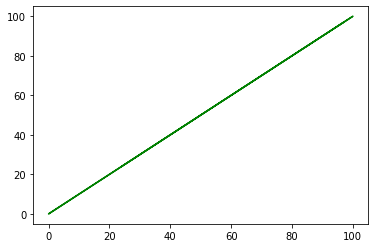

0.9888014444327563


In [16]:
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

plt.plot(X_train, model.predict(X_train), color='green')
plt.show()
print(accuracy)